In [1]:
# Executing these “magic commands” will inform your notebook to actively reload all imported modules and packages as they are modified.
%load_ext autoreload

In [2]:
# import necessary modules
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import glob
import os
import sys

In [3]:
module_path = os.path.abspath(os.getcwd())    
#module_path = module_path + '/modules'

if module_path not in sys.path:  
    print(module_path)
    sys.path.append(module_path)
else:
    print("Path already exists.")
    print(module_path)

Path already exists.
/Users/djdebonis/repos/sla


In [43]:
import Compare_IPA as ipa

In [5]:
# assigns umbrella parameters to create larger, higher-quality plots
plt.rcParams['figure.figsize'] = 15,7.5
plt.rcParams['font.size'] = 20

## Import, clean, compare, and concat datasets

Below we will import the data that was collected/developed in this study. There are three main components of this data:
1. Descriptive transcriptions (the IPA transcripts of the recordings that participants sent in)
2. Prescriptive transcription (the IPA transcript of what pronunciation 'should' be in Spanish)
3. Survey results

All of this data will be imported. Dictionaries will store all of the data for each participant. The data stored in the dictionary of each participant will include raw data of the file path and the orginal transcript, dataframes summarizing their results when compared against the prescriptive set, and their survey results.

In [6]:
desc_transcript_files = glob.glob('transcriptions/descriptive/*.txt') # take in all desc filepaths
presc_transcript_file = glob.glob('transcriptions/prescriptive/*.txt') # take in presc transc file
desc_transcript_files

['transcriptions/descriptive/partic13.txt',
 'transcriptions/descriptive/partic07.txt',
 'transcriptions/descriptive/partic06.txt',
 'transcriptions/descriptive/partic12.txt',
 'transcriptions/descriptive/partic04.txt',
 'transcriptions/descriptive/partic10.txt',
 'transcriptions/descriptive/partic11.txt',
 'transcriptions/descriptive/partic05.txt',
 'transcriptions/descriptive/partic01.txt',
 'transcriptions/descriptive/partic02.txt',
 'transcriptions/descriptive/partic03.txt']

In [7]:
presc_dictionary = ipa.bring_in_data(presc_transcript_file)
desc_dictionaries = ipa.bring_in_data(desc_transcript_files)

In [8]:
# iterate through all of the dictionaries and append respective DataFrames
# based on how their descriptive IPA transcription compares against the prescriptive
for index,dictionary in enumerate(desc_dictionaries):
    temp_desc_transcript = desc_dictionaries[index]["clean_transcript"]
    presc_transcript = presc_dictionary[0]["clean_transcript"]
    temp_df = ipa.string_list_phoneme_compare(temp_desc_transcript, presc_transcript)
    desc_dictionaries[index]['DF'] = temp_df

In [9]:
survey_data = pd.read_csv("survey_data.csv") # import the data from the survey 
survey_data.head()

,partic_number,age,self_identify,spanish_travel,travel_abroad,heritage_exposure,formal_instruct,years_formal_instruct,explicit_pronunciation,spanish_exposure,spanish_production,last_spanish,learn_spanish
0,partic10,20,Intermediate-Advanced,Yes,No,No,Yes,7.0,Yes,Sometimes,Sometimes,This month,Yes
1,partic04,21,Advanced,No,No,No,Yes,7.0,Yes,NaN,Rarely,This week,No
2,partic05,47,Beginner-Intermediate,Yes,No,No,No,0.0,No,Sometimes,Rarely,This week,Yes
3,partic02,28,Beginner-Intermediate,No,No,No,Yes,3.0,Yes,Sometimes,Almost never,It's been a long time,Yes
4,partic03,21,Beginner-Intermediate,Yes,No,No,Yes,3.0,Yes,Rarely,Sometimes,This week,No


In [10]:
questions=["What is your name?",
           "What is your age?", 
           "How would you self-identify in terms of your Spanish language ability?",
           "Have you ever traveled to a Spanish-speaking country, and, if so, did you communicate in Spanish while in that Spanish-speaking country?",
           "Have you ever traveled to a Spanish-speaking country on an education-focused travel-abroad program?",
           "Did you have any significant exposure to Spanish before the age of 10? (significant could mean: a family member spoke to you; you lived in a Spanish-speaking country; you took a Spanish class; etc.)",
           "Have you ever received formal Spanish language instruction?",
           "If you have you received formal Spanish language instruction, approximately how many years? (Assume each college semester = 1 year; each High School course = 1 year) If not, please enter '0'.",
           "If you have you ever received formal Spanish language instruction, have you every been explicitly taught Spanish pronunciation?",
           "How often do you have exposure to Spanish (outside of a classroom setting)?",
           "How often do you speak in Spanish (outside of a classroom setting)?",
           "When was the last time you spoke Spanish (outside of a classroom setting)?",
           "Are you currently trying to learn Spanish?"]
rows = survey_data.columns.values # get the values of the row  names in  the survey df
# len(rows) ==  len(questions3)
rows.shape

(13,)

In [11]:
# combine the data from the spreadsheet with the data of the dictionary according to partic_number
# result is one large dictionary for each partic with file info, result spreadsheet data,
# and survey data.
survey_dicts = survey_data.to_dict('record') # turn each row into a respective dictionary
for dct_index,dct in enumerate(desc_dictionaries): 
    partic = dct['file_name']
    
    for new_dct_index,new_dct in enumerate(survey_dicts): # the double loop allows this to 
        # funciton even though the range does not match between the results and the survey
        # dictionaries (some participants never finished their participation)
        if new_dct['partic_number'] == partic:
            desc_dictionaries[dct_index] = {**desc_dictionaries[dct_index],
                                            **survey_dicts[new_dct_index]}

In [12]:
# desc_dictionaries[0]['DF'].to_csv('example_datasheet.csv',  index = False)
# that ^^^ was written to give Dan an idea of what I'm working with

In [13]:
# example of what a completed comparrison DF looks like:
temp_dict = desc_dictionaries[0]
temp_dict.keys()

dict_keys(['full_path', 'file_name', 'prefix', 'extention', 'import_index', 'raw_transcript', 'clean_transcript', 'DF', 'partic_number', 'age', 'self_identify', 'spanish_travel', 'travel_abroad', 'heritage_exposure', 'formal_instruct', 'years_formal_instruct', 'explicit_pronunciation', 'spanish_exposure', 'spanish_production', 'last_spanish', 'learn_spanish'])

In [14]:
years_instruct = ipa.extract_from_dictionary(desc_dictionaries, 'years_formal_instruct')
years_instruct

[8.0, 4.0, 0.02, 7.0, 7.0, 7.0, 0.0, 0.0, 2.0, 3.0, 3.0]

In [15]:
years_instruct_mean = np.mean(years_instruct)
years_instruct_std = np.std(years_instruct)
print("In the sample, there was an average of " + str(years_instruct_mean) + 
      " years of formal instruction with a std of " + str(years_instruct_std))

In the sample, there was an average of 3.7290909090909086 years of formal instruction with a std of 2.954704890803063


In [16]:
"""
spanish_product = []
for i in range(len(index_numbers)): # create list of years of instruction with matching index to study_data for
    integer = index_numbers[i]
    spanish_production = survey_data['spanish_production'][integer]
    spanish_product.append(spanish_production)
    
for i in range(len(spanish_product)):
    if spanish_product[i] == 'Almost never':
        spanish_product[i] = 0
    elif spanish_product[i] == 'Rarely':
        spanish_product[i] = 1
    elif spanish_product[i] == 'Sometimes':
        spanish_product[i] = 2

spanish_product
"""

"\nspanish_product = []\nfor i in range(len(index_numbers)): # create list of years of instruction with matching index to study_data for\n    integer = index_numbers[i]\n    spanish_production = survey_data['spanish_production'][integer]\n    spanish_product.append(spanish_production)\n    \nfor i in range(len(spanish_product)):\n    if spanish_product[i] == 'Almost never':\n        spanish_product[i] = 0\n    elif spanish_product[i] == 'Rarely':\n        spanish_product[i] = 1\n    elif spanish_product[i] == 'Sometimes':\n        spanish_product[i] = 2\n\nspanish_product\n"

In [17]:
# import the dictionary for meta-data on specific words
word_data = pd.read_csv("dictionary.csv") 
# word_data.keys() # print the keys (columns) in the word dictionary
word_data

,word,vowel_focus1,vowel_focus2,init_vowel,term_vowel,cognate,list_number
0,taza,a,NaN,0,1,0,20
1,sabe,e,a,0,1,0,13
2,casi,i,a,0,1,0,6
3,tanto,o,a,0,1,0,24
4,su,u,NaN,0,1,0,17
5,ayuda,a,u,1,1,0,10
6,educación,e,u,1,0,1,3
7,importante,i,e,1,1,1,21
8,oportunidad,o,i,1,0,1,14
9,usar,u,NaN,1,0,1,7


In [18]:
# some simple descriptive stats about the words in the current list
# uses df extracted from dictionary.csv
vowel_init = word_data[word_data['init_vowel'] == 1] # count vowel-initial words in df
vowel_init_count = len(vowel_init)
print("Words in set that are vowel initial: " + str(vowel_init_count))

term_vowel = word_data[word_data['term_vowel'] == 1]
term_vowel_count = len(term_vowel)
print("Words in set that are terminal vowel: " + str(term_vowel_count))

cognates = word_data[word_data['cognate'] == 1]
cognates_count = len(cognates)
print("Words in set that are cognates: " + str(cognates_count))

Words in set that are vowel initial: 15
Words in set that are terminal vowel: 17
Words in set that are cognates: 6


In [19]:
partic_names = []
study_data = []
years_instruct = []
order = []

for index, dictionary in enumerate(desc_dictionaries):
        df = dictionary['DF']
        
        partic_name = dictionary['partic_number']
        years = dictionary['years_formal_instruct']
        order.append(index)
        partic_names.append(partic_name)
        study_data.append(df)
        years_instruct.append(years)
        
print(partic_names)
print(order)
print(years_instruct)
study_data[0]


['partic13', 'partic07', 'partic06', 'partic12', 'partic04', 'partic10', 'partic11', 'partic05', 'partic01', 'partic02', 'partic03']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[8.0, 4.0, 0.02, 7.0, 7.0, 7.0, 0.0, 0.0, 2.0, 3.0, 3.0]


,word_number,prescriptive_pronunciation,student_pronunciation,syllable_number,prescriptive_syllable,student_syllable,correct_allophone,student_allophone
0,0,i-se,i-se,0,i,i,i,i
1,0,i-se,i-se,1,se,se,e,e
2,1,kom-bi-na-si̯on,kom-bi-na-si̯on,0,kom,kom,o,o
3,1,kom-bi-na-si̯on,kom-bi-na-si̯on,1,bi,bi,i,i
4,1,kom-bi-na-si̯on,kom-bi-na-si̯on,2,na,na,a,a
5,1,kom-bi-na-si̯on,kom-bi-na-si̯on,3,si̯on,si̯on,i̯o,i̯o
6,2,i-ni-si̯o,i-ni-si̯o,0,i,i,i,i
7,2,i-ni-si̯o,i-ni-si̯o,1,ni,ni,i,i
8,2,i-ni-si̯o,i-ni-si̯o,2,si̯o,si̯o,i̯o,i̯o
9,3,e-ðu-ka-si̯on,e-ðu-ka-si̯on,0,e,e,e,e


In [20]:
# eventually write a function that allows the user to choose how much data and which data they want to extract from the dictionaries
"""
partic_names = []
datasets = []
years_instruct = []

for index, dictionary in enumerate(desc_dictionaries):
        df = dictionary['DF']
        
        partic_name = dictionary['partic_number']
        years = dictionary['years_formal_instruct']
        partic_names.append(partic_name)
        datasets.append(df)
        years_instruct.append(years_instruct)
        
datum = pd.DataFrame(list(zip(years_instruct, df)), index = partic_names, columns = ['years_instruct','dataframes'])
datum
"""

"\npartic_names = []\ndatasets = []\nyears_instruct = []\n\nfor index, dictionary in enumerate(desc_dictionaries):\n        df = dictionary['DF']\n        \n        partic_name = dictionary['partic_number']\n        years = dictionary['years_formal_instruct']\n        partic_names.append(partic_name)\n        datasets.append(df)\n        years_instruct.append(years_instruct)\n        \ndatum = pd.DataFrame(list(zip(years_instruct, df)), index = partic_names, columns = ['years_instruct','dataframes'])\ndatum\n"

In [21]:
total_accuracy = ipa.get_proportions(study_data)
total_accuracy_mean = np.mean(total_accuracy)
total_accuracy_std = np.std(total_accuracy)
print("In total, the particpants scored an average of " + str(total_accuracy_mean) +
      " accuracy with std of: " + str(total_accuracy_std))

In total, the particpants scored an average of 0.795069337442219 accuracy with std of: 0.11299668485238278


In [22]:
# calculate mean and std for non-cognate pronunciation accuracy across the *entire* sample
non_cognate_dfs = ipa.filter_by_dictionary(word_data, "cognate", 0, study_data)
non_cognate_accuracy = ipa.get_proportions(non_cognate_dfs)
non_cognate_accuracy
non_cognate_accuracy_mean = np.mean(non_cognate_accuracy)
non_cognate_accuracy_std = np.std(non_cognate_accuracy)
print("For non-cognates, the particpants scored an average of " + str(non_cognate_accuracy_mean) +
      " accuracy with std of: " + str(non_cognate_accuracy_std))

For non-cognates, the particpants scored an average of 0.8058968058968059 accuracy with std of: 0.09349531985474423


In [23]:
# calculate mean and std for cognate pronunciation accuracy across the *entrie* sample
cognate_dfs = ipa.filter_by_dictionary(word_data, "cognate", 1, study_data) # create a list of dfs that only accounts for the cognates in the study
cognate_accuracy = ipa.get_proportions(cognate_dfs)
cognate_accuracy
cognate_accuracy_mean = np.mean(cognate_accuracy)
cognate_accuracy_std = np.std(cognate_accuracy)
print("For cognates, the particpants scored an average of " + str(cognate_accuracy_mean) +
      " accuracy with std of: " + str(cognate_accuracy_std))

For cognates, the particpants scored an average of 0.7768595041322314 accuracy with std of: 0.1781178682830769


In [24]:
# check hypothesis that there is a difference between cognates and non-cognates
stat.ttest_ind(cognate_accuracy, non_cognate_accuracy, equal_var=False)

Ttest_indResult(statistic=-0.4564612087804604, pvalue=0.6545460439030168)

The t-test confirms that there *is not* enough evidence to support a statistically significant differenc of the average pronunciation accuarcy between cognates and non-cognaates in the sample.

## Linear Regression

Below a linear regression has been applied, for the dataset is so small that it doesn't really matter anyway because any regression we draw will be inconclusive due to the small data size. However, it is likely that a polynomial regression would be a stronger fit because pronunciation begins to plateu more and more as it reaches native ceiling. 

In [25]:
#total_accuracy_log = np.log(total_accuracy)
#total_accuracy_log

In [26]:
# vagabond matrix of years for linear regression
years_instruct_matrix = np.column_stack((np.ones(len(years_instruct)), years_instruct))
years_instruct = np.array(years_instruct)

In [27]:
accuracy_coeffs = np.polyfit(years_instruct, total_accuracy, 1)
accuracy_coeffs

array([0.01459756, 0.7406337 ])

In [28]:
"""
def model_coeffs(design_matrix, signal): # model the coefficients for the linear regression
    return np.linalg.pinv(design_matrix)@signal # 'pinv' is a pseudo inverse

accuracy_coeffs = model_coeffs(years_instruct_matrix, total_accuracy) # coefficients of accuracy as a function of years/formal lang instruct
accuracy_coeffs
"""

"\ndef model_coeffs(design_matrix, signal): # model the coefficients for the linear regression\n    return np.linalg.pinv(design_matrix)@signal # 'pinv' is a pseudo inverse\n\naccuracy_coeffs = model_coeffs(years_instruct_matrix, total_accuracy) # coefficients of accuracy as a function of years/formal lang instruct\naccuracy_coeffs\n"

In [29]:
# y = np.exp(accuracy_coeffs[1]) * np.exp(accuracy_coeffs[0]*years_instruct)

In [30]:
# assign intercept (b) and slope (m) from previously returned array
accuracy_intercept = accuracy_coeffs[1]
accuracy_slope = accuracy_coeffs[0]

In [31]:
# np.poly1d(accuracy_coeffs)

https://kenbenoit.net/assets/courses/ME104/logmodels2.pdf

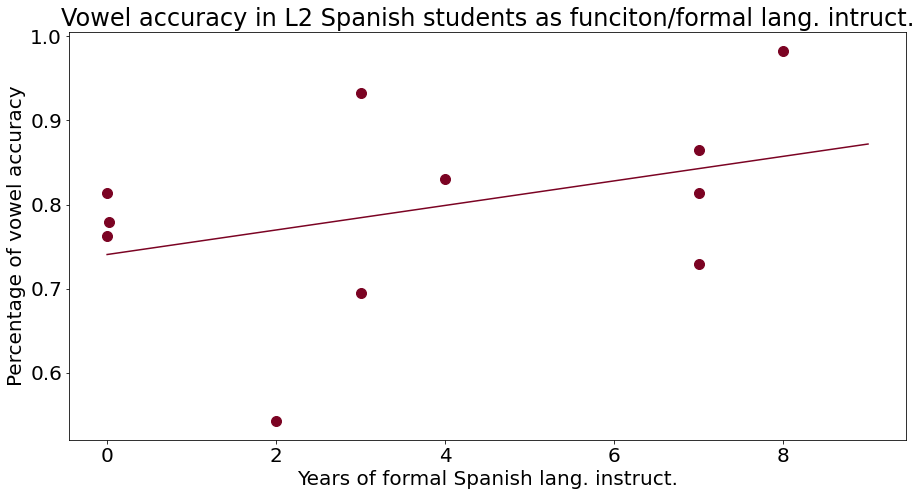

In [32]:
# define the linspace for the plot and the regression
plot_resolution = 1000
mn, mx = np.min(0), np.max(max(years_instruct) + 1)
years_instruct_lin = np.linspace(mn, mx, plot_resolution)

predicted_accuracy = (accuracy_intercept + (years_instruct_lin*accuracy_slope))

plt.plot(years_instruct_lin, predicted_accuracy, c = "xkcd:wine red") # plot the regression--if you could even call it that--of the function
plt.scatter(years_instruct, total_accuracy, s= 100, c = "xkcd:wine red") # plot the individual data points

plt.xlabel('Years of formal Spanish lang. instruct.')
plt.ylabel('Percentage of vowel accuracy')
plt.title('Vowel accuracy in L2 Spanish students as funciton/formal lang. intruct.')

plt.savefig("vowel_accuracy_formal_lang_instruct.png")
plt.show()

Text(0.5, 1.0, 'visual check for heteroscedasticity')

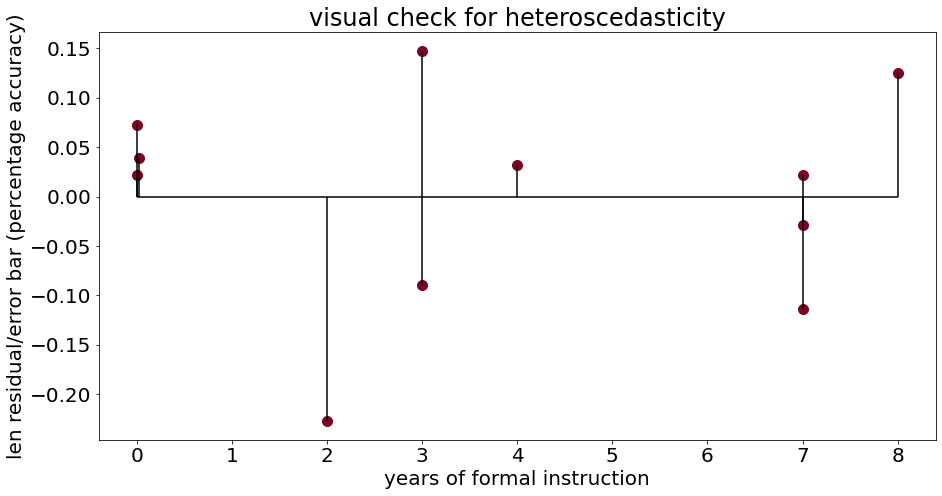

In [33]:
# Visual check for hederoskedasticity

# find out what the predicted values would be according to the coefficients previously determined
predicted_values = []
for i in range(len(years_instruct)):
    predicted_value = (accuracy_intercept + (years_instruct[i] * accuracy_slope))
    predicted_values.append(predicted_value)

# keep track of the residuals and such
heterosked = np.array([total_accuracy, predicted_values])
residual = heterosked[0] - heterosked[1]

# this is the linear fit if it was 'tilted' towards a y=0 axis
plt.hlines(0, 0, 8)

# scatter the residuals away from the regression
plt.scatter(years_instruct, residual,  color = "xkcd:wine red", s = 100)
plt.vlines(years_instruct, 0, residual)


plt.xlabel('years of formal instruction')
plt.ylabel('len residual/error bar (percentage accuracy)')
plt.title('visual check for heteroscedasticity')

### Linear regression? no
It's relatively clear that a linear regression is not the right fit. 

This is first depicted by the coefficients, which logically do not represent the aquisition of Spanish vowels by native english speakers (NES): most NESs who have received 0 years of formal Spanish education *do not* pronounce 75.6% of Spanish vowels correctly, and the growth is likely higher than 0.8% per year.

This is also depicted by the check for heteroskedasticity plot which--although is only representing a small sample--seems to represent a fit that grows quickly and then plateus, as opposed to a steady increase to ceiling.

*What I think I'm learning from the above graphs is that we need to accont for more factors in order to do any sort of regression. Years instruct is not the only factor, because immersion plays a HUGE role in phonetic aquisition. Next step is to work on making more than one variable communicate*

In [44]:
vowel_aq_arr = np.array([years_instruct, total_accuracy])
vowel_aq_arr = vowel_aq_arr.reshape(8,2)
vowel_aq = pd.DataFrame(vowel_aq_arr)
vowel_aq

ValueError: cannot reshape array of size 22 into shape (8,2)

In [45]:
# This would require a much larger sample size (as most of this study would), but a chart like this would
# predict accuracy based on when the last time they produced Spansh was based on a 7-point Likert Scale

#plt.plot(years_instruct_lin, predicted_accuracy, c = "xkcd:wine red") # plot the regression--if you could even call it that--of the function
plt.scatter(spanish_product, total_accuracy, s= 100, c = "xkcd:wine red") # plot the individual data points

plt.xlabel('Last spanish production')
plt.ylabel('Percentage of vowel accuracy')
plt.title('Vowel accuracy in L2 Spanish students as funciton/last production')

plt.show()

NameError: name 'spanish_product' is not defined

In [46]:
allophone_e = ipa.descriptive_stats(study_data, 'e')

AttributeError: 'Series' object has no attribute 'contains'

In [38]:
allophone_i = ipa.descriptive_stats(study_data, 'i')

AttributeError: 'Series' object has no attribute 'contains'

In [39]:
allophone_u = ipa.descriptive_stats(study_data,'u')

AttributeError: 'Series' object has no attribute 'contains'

In [40]:
allophone_o = ipa.descriptive_stats(study_data,'o')

AttributeError: 'Series' object has no attribute 'contains'

In [41]:
new_lsa = ipa.filter_by_allophone(study_data, 'a')
new_lsa[0]

AttributeError: 'Series' object has no attribute 'contains'